In [6]:
#1.4.10
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import pyplot as plt

img = cv2.imread('image2.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
print(np.transpose(hist))


[[ 172.  413.  306.  504.  758.  807.  824.  734.  670.  557.  556.  543.
   578.  745.  862.  866.  687.  630.  680.  704.  810.  874.  876.  758.
   734.  699.  661.  846.  913.  971.  863.  747.  751.  823.  903. 1134.
  1067. 1078.  848.  815.  931. 1209. 1315. 1406. 1334. 1220. 1044. 1335.
  1490. 1772. 1896. 1746. 1470. 1239. 1505. 1849. 1914. 1956. 1823. 1548.
  1177. 1418. 1576. 1686. 1740. 1658. 1631. 1590. 2187. 2822. 3184. 3608.
  3314. 2614. 2540. 2678. 2839. 3010. 2863. 2757. 2814. 3008. 2559. 3437.
  3617. 3755. 3631. 3313. 3117. 2955. 3287. 3778. 3828. 3991. 3429. 3411.
  3300. 3616. 3699. 3916. 3748. 3228. 3239. 3289. 3750. 4229. 4224. 3967.
  3283. 3192. 3262. 3505. 3977. 3893. 3873. 3065. 2889. 2780. 2797. 3038.
  3193. 3187. 2575. 2504. 2460. 2394. 2783. 2838. 2613. 2238. 1806. 1754.
  1631. 1831. 1988. 1556. 1200. 1004.  818.  868. 1055. 1162. 1062.  928.
   840.  648.  737.  854.  904.  938.  834.  784.  670.  706.  869.  969.
   981.  918.  792.  659.  713.  855. 

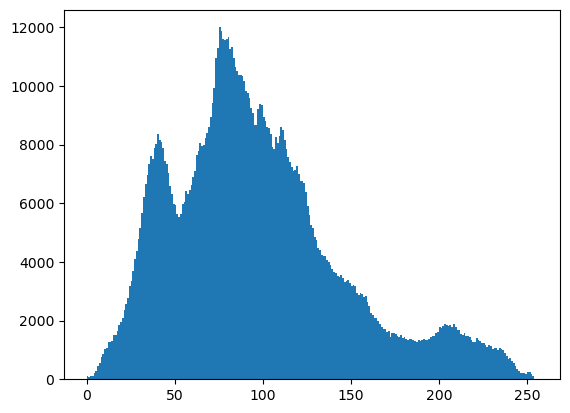

In [11]:
hist = np.bincount(img.ravel(),minlength=256)
plt.hist(img.ravel(),256,[0,256]); plt.show()

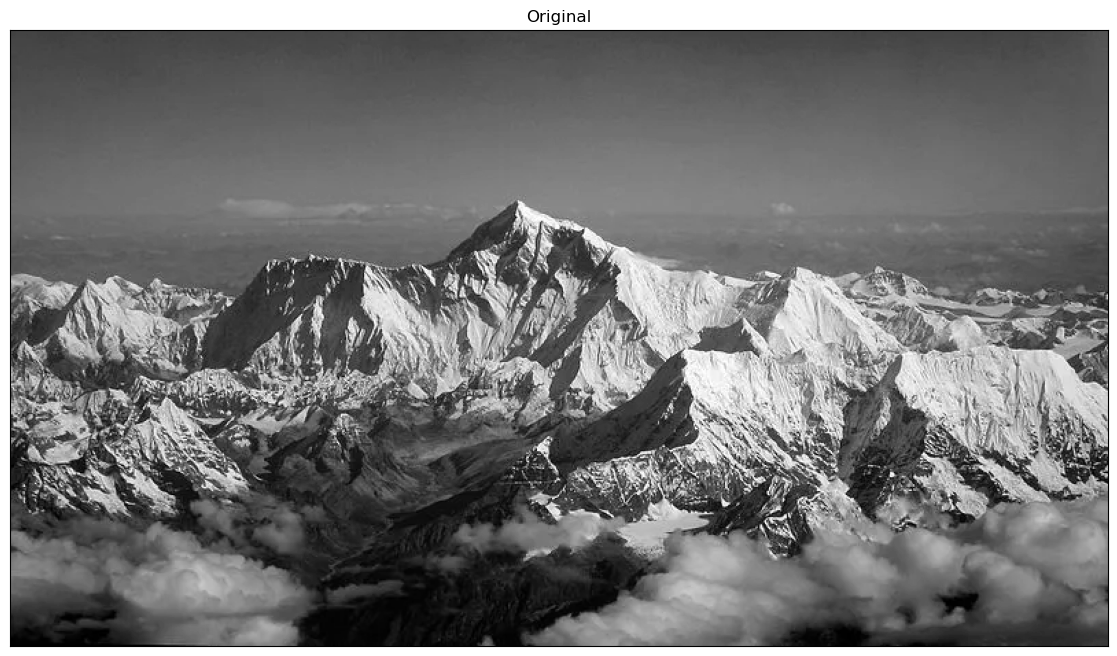

In [17]:
plt.figure(figsize=(24,8))
plt.subplot(1,1,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

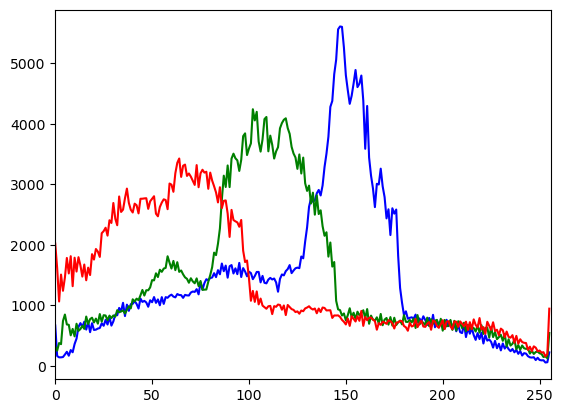

In [12]:
img = cv2.imread('image2.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


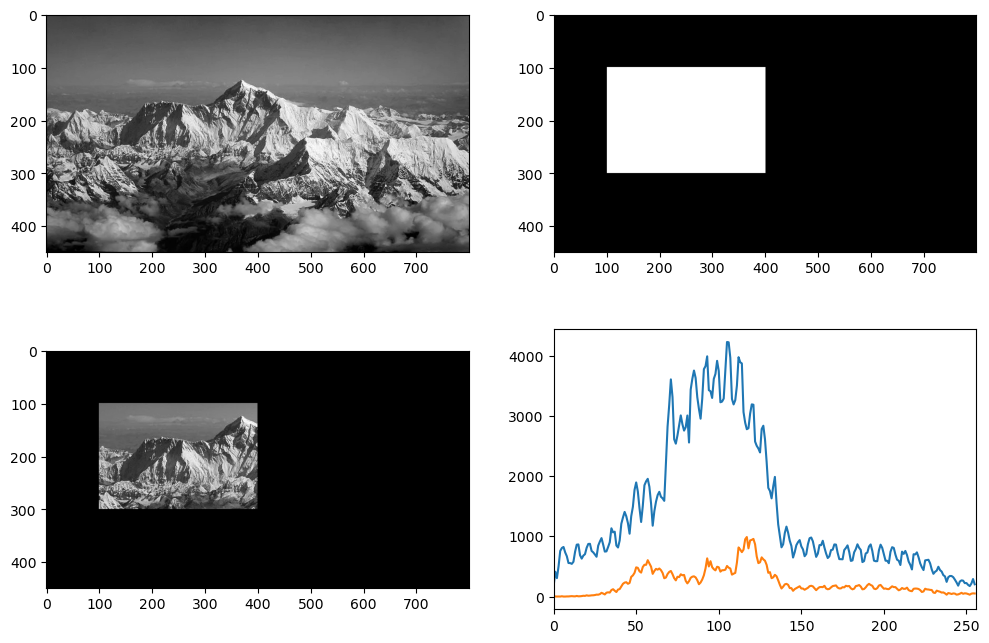

In [13]:
img = cv2.imread('image2.jpg',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.figure(figsize=(12,8))
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()


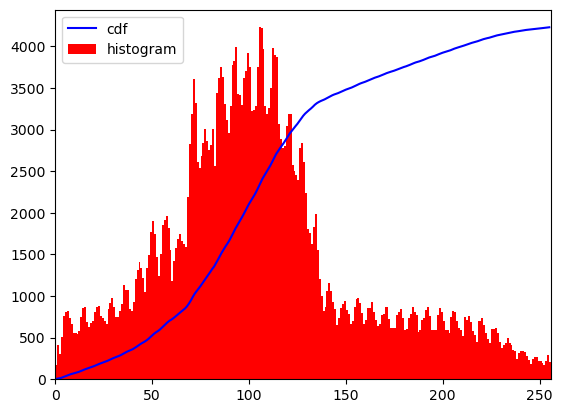

In [23]:
img = cv2.imread('image2.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()



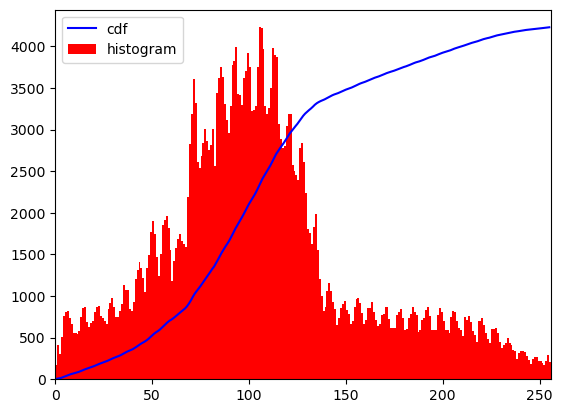

In [29]:

hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()



In [30]:
img = cv2.imread('image2.jpg',0)
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)


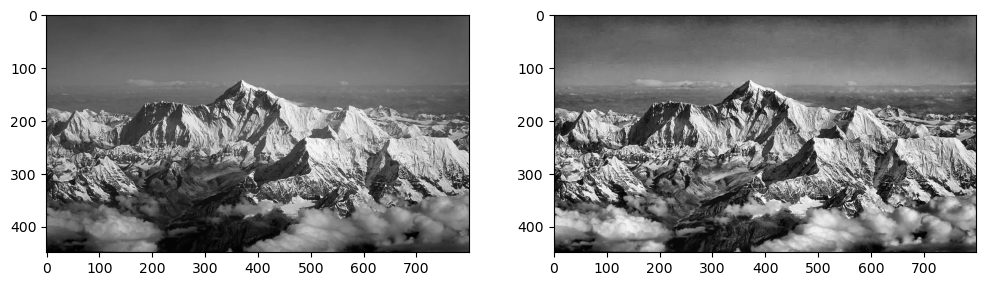

In [32]:
plt.figure(figsize=(12,8))
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(cl1,'gray')
plt.show()

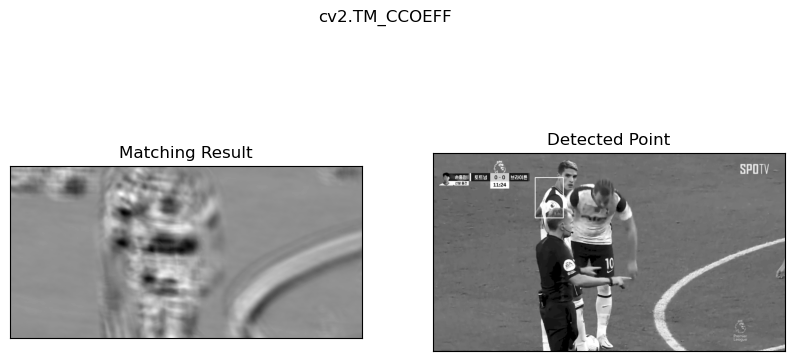

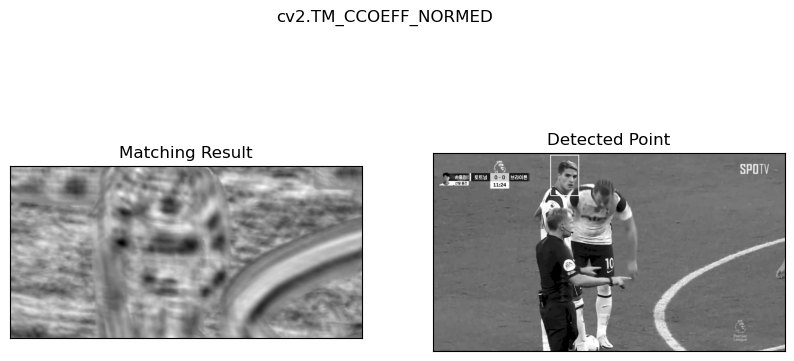

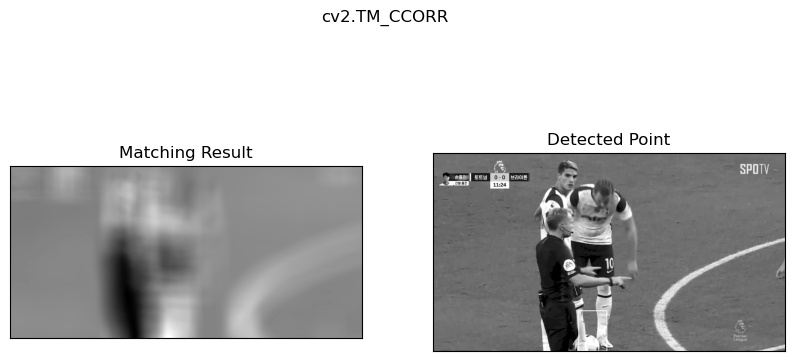

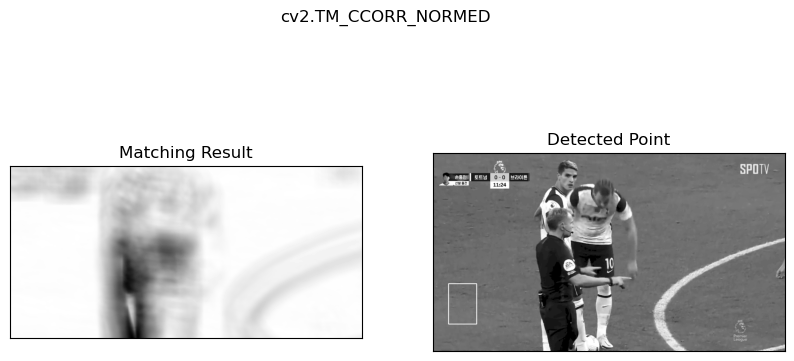

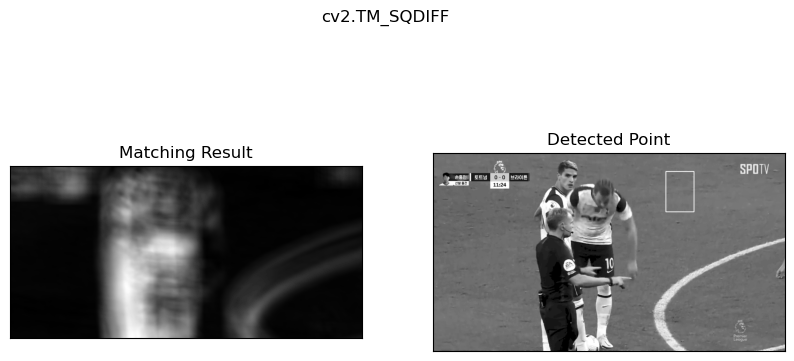

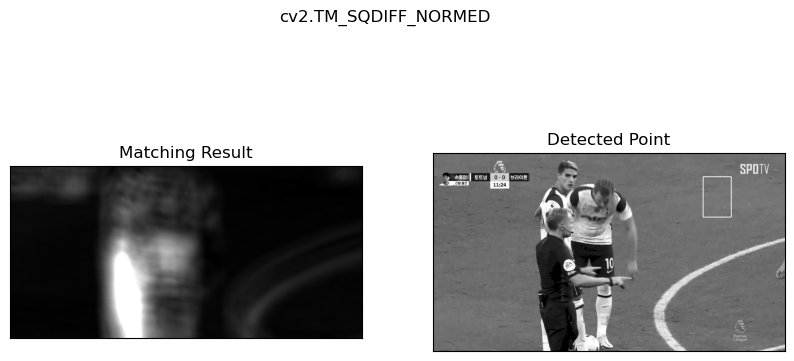

In [12]:
#1.4.12
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import pyplot as plt

img = cv2.imread('hmson1.avi_000083291.png',0) #mario 
img2 = img.copy()
template = cv2.imread('20201105_125557.png',0) #coin
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
    'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.figure(figsize=(10,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()


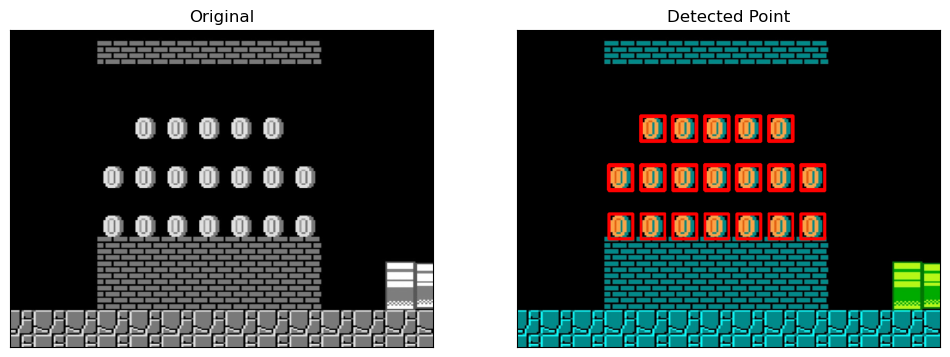

In [53]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img_rgb = cv2.imread('mario.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('mario_coin.png',0)
res = cv2.imread('res.png',1)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8

loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

img_rgb = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2RGB)
'''
cv2.imwrite('res.png',img_rgb)
res = cv2.imread('res.png')
res = cv2.cvtColor(res,cv2.COLOR_BGR2RGB)
'''




plt.figure(figsize=(12,8))
plt.subplot(121),plt.imshow(img_gray,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_rgb)
plt.title("Detected Point"), plt.xticks([]), plt.yticks([])
plt.show()

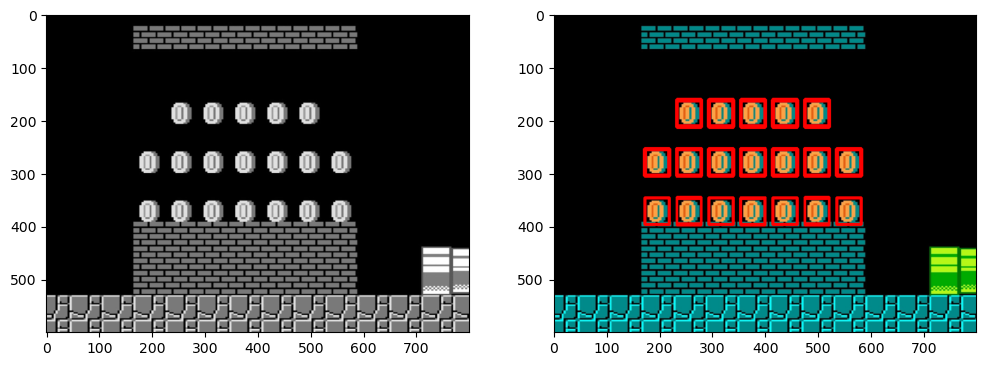

In [54]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread('mario.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = img_gray[162:162+50, 232:232+46]
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8

loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
  cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
#cv2.imwrite('res.png',img_rgb)
img_rgb = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,8))
plt.subplot(121), plt.imshow(img_gray, 'gray')
plt.subplot(122), plt.imshow(img_rgb)
plt.show()